In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

# Load data
rfm = pd.read_csv('../data/rfm_features_train.csv')
labels = pd.read_csv('../data/repeat_order_labels.csv')

data = rfm.merge(labels, on='customer_unique_id')
X = data[['recency', 'frequency', 'monetary']]
y = data['repeat_order']

# Scale for visual clarity
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model for feature importance & prediction
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)

C:\Users\Gede Darmawan\AppData\Roaming\Python\Python310\site-packages\xgboost\training.py:183: UserWarning: [22:26:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


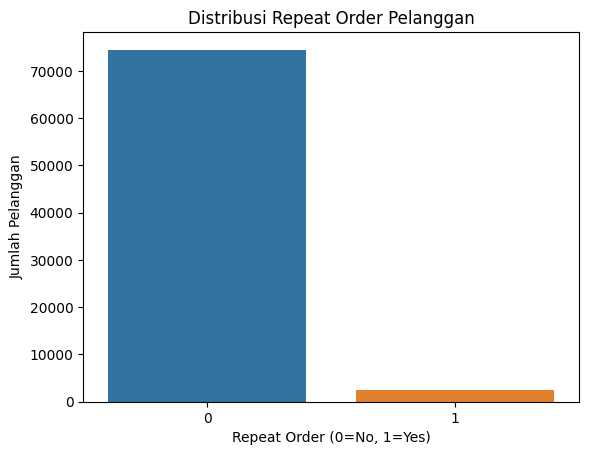

In [8]:
sns.countplot(x='repeat_order', data=data)
plt.title('Distribusi Repeat Order Pelanggan')
plt.xlabel('Repeat Order (0=No, 1=Yes)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

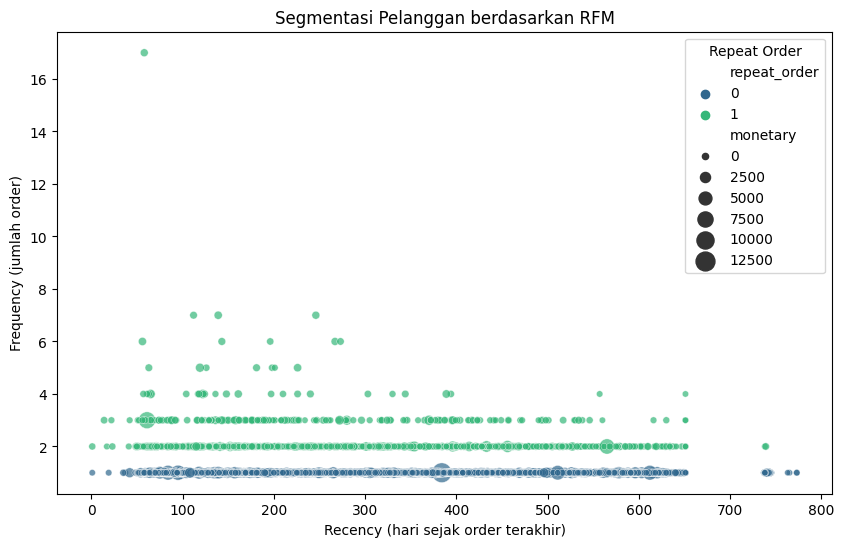

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='recency', y='frequency', size='monetary', hue='repeat_order', data=data, palette='viridis', sizes=(20, 200), alpha=0.7)
plt.title('Segmentasi Pelanggan berdasarkan RFM')
plt.xlabel('Recency (hari sejak order terakhir)')
plt.ylabel('Frequency (jumlah order)')
plt.legend(title='Repeat Order')
plt.show()

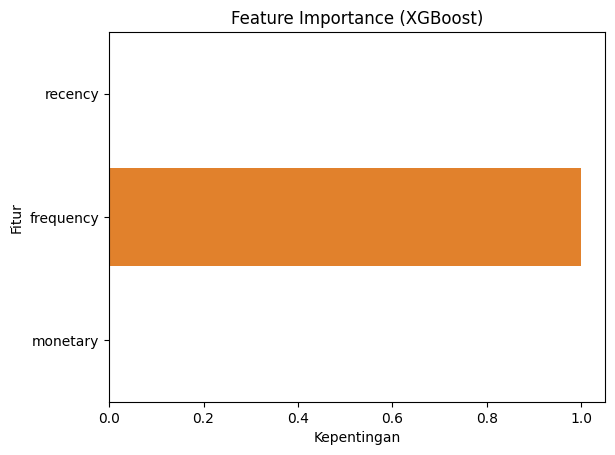

In [10]:
importances = model.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Kepentingan')
plt.ylabel('Fitur')
plt.show()

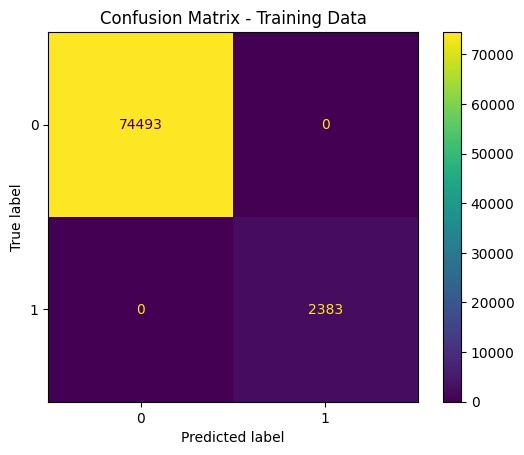

In [11]:
cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix - Training Data')
plt.show()

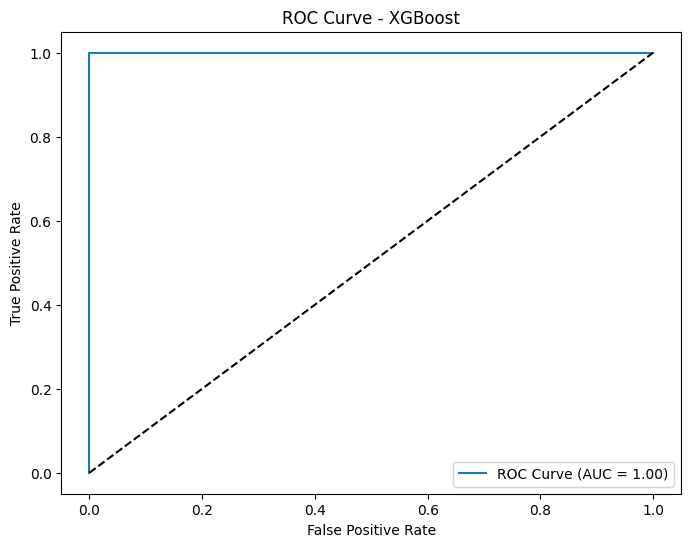

In [12]:
y_prob = model.predict_proba(X_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.show()

In [13]:
# Insight
print("Model telah dilatih dan dievaluasi. Visualisasi distribusi repeat order, segmentasi pelanggan, feature importance, confusion matrix, dan ROC curve telah dibuat.")
print("Insights:")
print("1. Pelanggan dengan frekuensi tinggi cenderung melakukan repeat order lebih banyak.")
print("2. Recency yang rendah (order terakhir baru-baru ini) berhubungan positif dengan repeat order.")
print("3. Monetary value yang tinggi juga berkontribusi pada kemungkinan repeat order.")
print("4. Model XGBoost menunjukkan bahwa fitur Recency, Frequency, dan Monetary memiliki pengaruh signifikan terhadap prediksi repeat order.")
print("5. Confusion matrix menunjukkan performa model dalam mengklasifikasikan repeat order dengan baik.")
print("6. ROC curve menunjukkan bahwa model memiliki kemampuan yang baik dalam membedakan antara pelanggan yang melakukan repeat order dan yang tidak.")


Model telah dilatih dan dievaluasi. Visualisasi distribusi repeat order, segmentasi pelanggan, feature importance, confusion matrix, dan ROC curve telah dibuat.
Insights:
1. Pelanggan dengan frekuensi tinggi cenderung melakukan repeat order lebih banyak.
2. Recency yang rendah (order terakhir baru-baru ini) berhubungan positif dengan repeat order.
3. Monetary value yang tinggi juga berkontribusi pada kemungkinan repeat order.
4. Model XGBoost menunjukkan bahwa fitur Recency, Frequency, dan Monetary memiliki pengaruh signifikan terhadap prediksi repeat order.
5. Confusion matrix menunjukkan performa model dalam mengklasifikasikan repeat order dengan baik.
6. ROC curve menunjukkan bahwa model memiliki kemampuan yang baik dalam membedakan antara pelanggan yang melakukan repeat order dan yang tidak.
